## Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import joblib
import pickle

## Loading the dataset

In [2]:
df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

## Performing Univariate Analysis

### Using Pie Chart

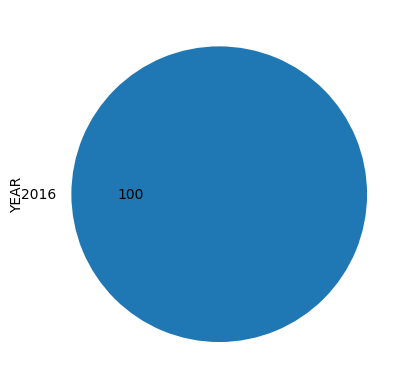

In [4]:
df['YEAR'].value_counts().plot(kind='pie', autopct='%.0f')
plt.show()

## Performing Bivariate Analysis

### Using scatterplot

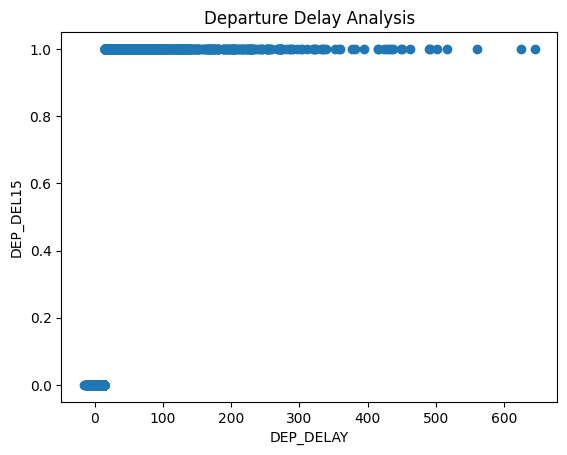

In [5]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Departure Delay Analysis')
plt.xlabel('DEP_DELAY')
plt.ylabel('DEP_DEL15')
plt.show()

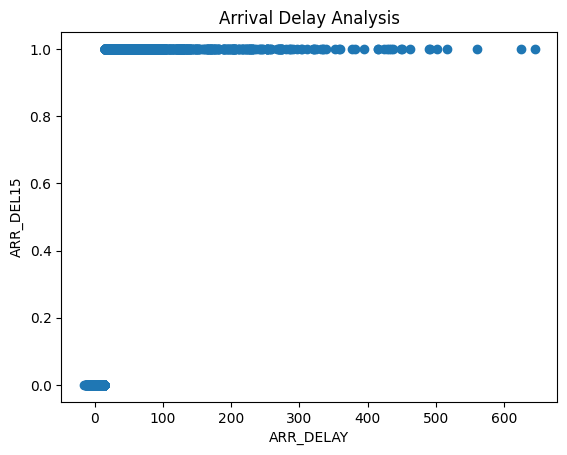

In [6]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Arrival Delay Analysis')
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.show()

### Using lineplots

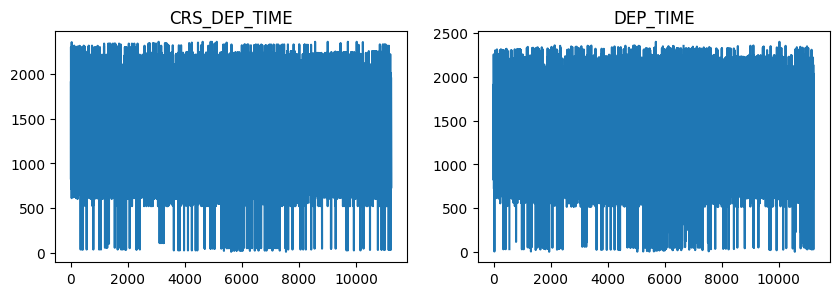

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_DEP_TIME')
plt.plot(df.CRS_DEP_TIME)
plt.subplot(1, 2, 2)
plt.title('DEP_TIME')
plt.plot(df.DEP_TIME)
plt.show()

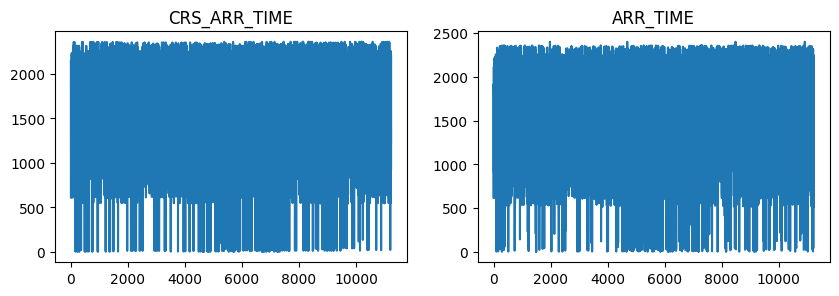

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ARR_TIME')
plt.plot(df.CRS_ARR_TIME)
plt.subplot(1, 2, 2)
plt.title('ARR_TIME')
plt.plot(df.ARR_TIME)
plt.show()

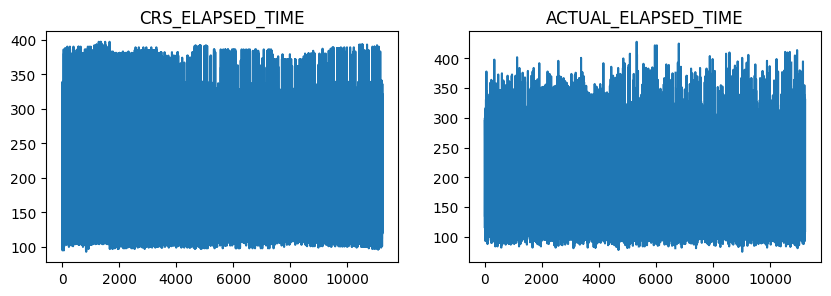

In [9]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ELAPSED_TIME')
plt.plot(df.CRS_ELAPSED_TIME)
plt.subplot(1, 2, 2)
plt.title('ACTUAL_ELAPSED_TIME')
plt.plot(df.ACTUAL_ELAPSED_TIME)
plt.show()

## Performing Multivariate Analysis

### Using pairplot

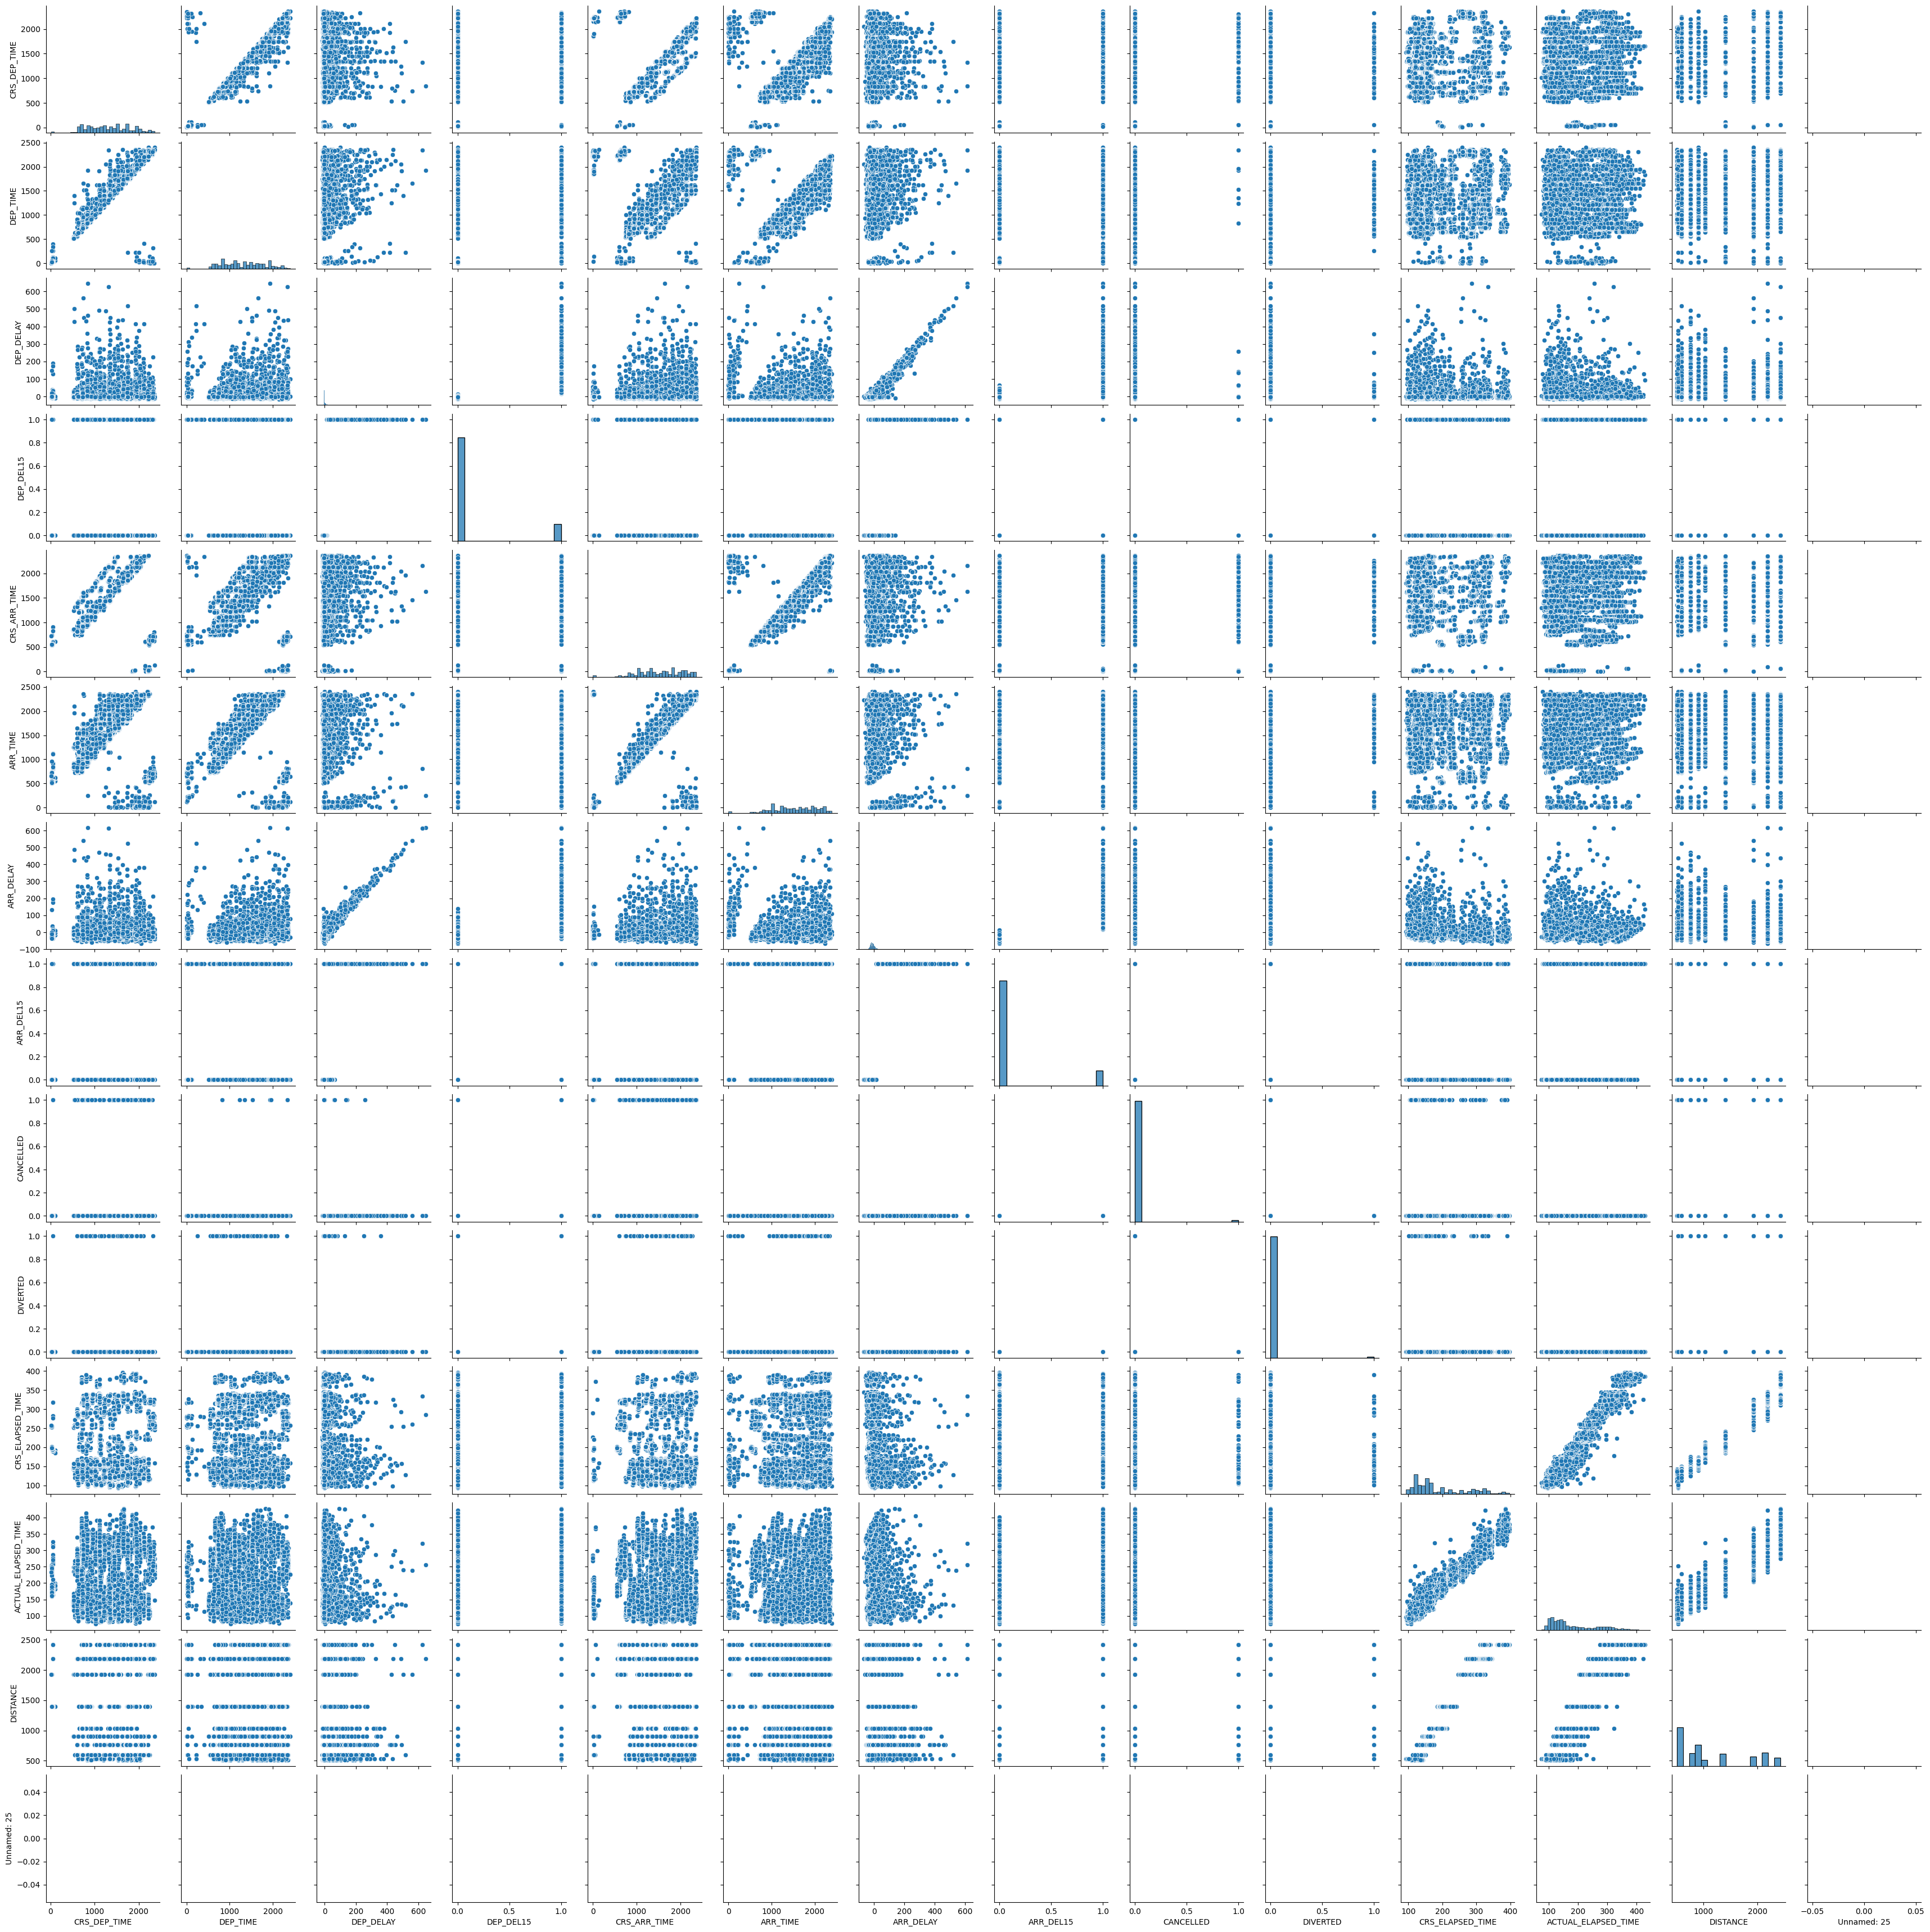

In [10]:
sb.pairplot(df.iloc[:, 12:])
plt.show()

### Using heatmap

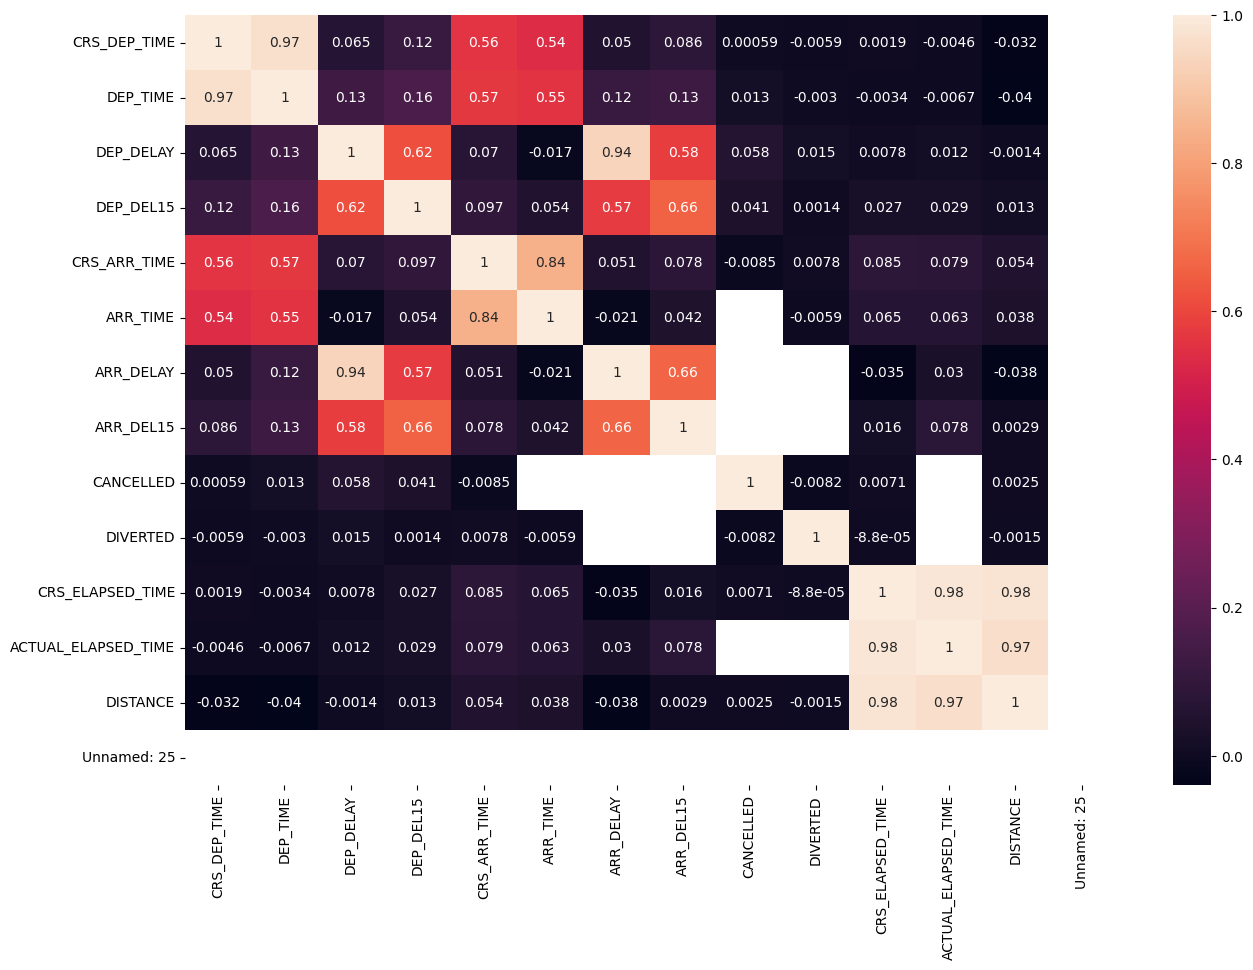

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(df.iloc[:, 12:].corr(), annot=True, ax=ax)
plt.show()

## Performing Descriptive Analysis

In [12]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


## Dropping unnecessary columns

In [13]:
df = df[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DEL15']]
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,ATL,SEA,0.0,2143,0.0
1,1476,1,1,5,DTW,MSP,0.0,1435,0.0
2,1597,1,1,5,ATL,SEA,0.0,1215,0.0
3,1768,1,1,5,SEA,MSP,0.0,1335,0.0
4,1823,1,1,5,SEA,DTW,0.0,607,0.0


## Handling Missing Values

### Checking for null values

In [14]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15        True
CRS_ARR_TIME    False
ARR_DEL15        True
dtype: bool

### Replacing null values

In [15]:
df.fillna(df['DEP_DEL15'].mode()[0], inplace=True)
df.fillna(df['ARR_DEL15'].mode()[0], inplace=True)

### Checking if the replacement is made

In [16]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15       False
CRS_ARR_TIME    False
ARR_DEL15       False
dtype: bool

## Handling Outliers

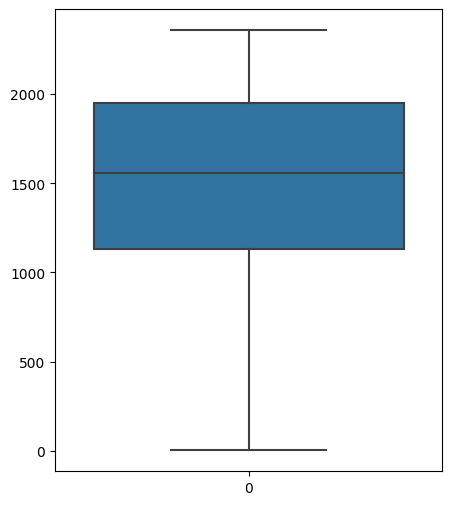

In [17]:
fig, ax = plt.subplots(figsize=(5, 6))
sb.boxplot(data=df['CRS_ARR_TIME'])
plt.show()

<b> There are no outliers </b>

## Encoding

### One Hot Encoding

In [18]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,0.0,2143,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,0.0,1435,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,0.0,1215,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,0.0,1335,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,0.0,607,0.0,0,0,0,0,1,0,1,0,0,0


In [19]:
df.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_DEL15', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK',
       'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL', 'DEST_DTW', 'DEST_JFK',
       'DEST_MSP', 'DEST_SEA'],
      dtype='object')

## Splitting dataset into Independent and Dependent Variables

In [20]:
X = df.drop(columns=['ARR_DEL15'])
Y = df[['ARR_DEL15']]

## Converting the Independent and Dependent Variables to 1D Arrays

In [21]:
X = X.values
Y = Y.values

## Splitting dataset into Train and Test datasets

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8984, 16), (2247, 16), (8984, 1), (2247, 1))

## Building the Machine Learning Models

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=800)
log_reg.fit(X_train, Y_train.ravel())

LogisticRegression(max_iter=800)

### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train.ravel())

DecisionTreeClassifier()

### KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier()

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, max_depth=3)
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=15)

## Testing the Models

### Logistic Regression

In [28]:
Y_pred_log_train = log_reg.predict(X_train)
Y_pred_log_test = log_reg.predict(X_test)

In [29]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    7769
1.0    1215
dtype: int64

In [30]:
pd.DataFrame(Y_pred_log_test).value_counts()

0.0    1931
1.0     316
dtype: int64

### Decision Tree Classifier

In [31]:
Y_pred_clf_train = clf.predict(X_train)
Y_pred_clf_test = clf.predict(X_test)

In [32]:
pd.DataFrame(Y_pred_clf_train).value_counts()

0.0    7871
1.0    1113
dtype: int64

In [33]:
pd.DataFrame(Y_pred_clf_test).value_counts()

0.0    1949
1.0     298
dtype: int64

### KNN Classifier

In [34]:
Y_pred_knn_train = knn.predict(X_train)
Y_pred_knn_test = knn.predict(X_test)

In [35]:
pd.DataFrame(Y_pred_knn_train).value_counts()

0.0    8691
1.0     293
dtype: int64

In [36]:
pd.DataFrame(Y_pred_knn_test).value_counts()

0.0    2164
1.0      83
dtype: int64

### Random Forest Classifier

In [37]:
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)

In [38]:
pd.DataFrame(Y_pred_rf_train).value_counts()

0.0    8354
1.0     630
dtype: int64

In [39]:
pd.DataFrame(Y_pred_rf_test).value_counts()

0.0    2096
1.0     151
dtype: int64

## Evaluating the ML Models using Metrics

### Logistic Regression

##### Classification Report

In [40]:
print(classification_report(Y_test, Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1985
         1.0       0.60      0.73      0.66       262

    accuracy                           0.91      2247
   macro avg       0.78      0.83      0.81      2247
weighted avg       0.92      0.91      0.92      2247



##### Accuracy, Precision, Recall, F1 Score

In [41]:
acc_log = accuracy_score(Y_test, Y_pred_log_test)
prec_log, rec_log, f1_log, sup_log = precision_recall_fscore_support(Y_test, Y_pred_log_test)
print('Accuracy Score =', acc_log)
print('Precision =', prec_log[0])
print('Recall =', rec_log[0])
print('F1 Score =', f1_log[0])

Accuracy Score = 0.9127725856697819
Precision = 0.9632314862765406
Recall = 0.9370277078085643
F1 Score = 0.9499489274770173


##### Checking for Overfitting and Underfitting

In [42]:
log_train_acc = accuracy_score(Y_train, Y_pred_log_train)
log_test_acc = accuracy_score(Y_test, Y_pred_log_test)
print('Training Accuracy =', log_train_acc)
print('Testing Accuracy =', log_test_acc)

Training Accuracy = 0.9205253784505788
Testing Accuracy = 0.9127725856697819


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [43]:
pd.crosstab(Y_test.ravel(), Y_pred_log_test)

col_0,0.0,1.0
row_0,,
0.0,1860,125
1.0,71,191


### Decision Tree Classifier

##### Classification Report

In [44]:
print(classification_report(Y_test, Y_pred_clf_test))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1985
         1.0       0.45      0.51      0.48       262

    accuracy                           0.87      2247
   macro avg       0.69      0.71      0.70      2247
weighted avg       0.88      0.87      0.87      2247



##### Accuracy, Precision, Recall, F1 Score

In [45]:
acc_clf = accuracy_score(Y_test, Y_pred_clf_test)
prec_clf, rec_clf, f1_clf, sup_clf = precision_recall_fscore_support(Y_test, Y_pred_clf_test)
print('Accuracy Score =', acc_clf)
print('Precision =', prec_clf[0])
print('Recall =', rec_clf[0])
print('F1 Score =', f1_clf[0])

Accuracy Score = 0.8700489541611037
Precision = 0.9343252950230888
Recall = 0.9173803526448363
F1 Score = 0.9257752923233351


##### Checking for Overfitting and Underfitting

In [46]:
clf_train_acc = accuracy_score(Y_train, Y_pred_clf_train)
clf_test_acc = accuracy_score(Y_test, Y_pred_clf_test)
print('Training Accuracy =', clf_train_acc)
print('Testing Accuracy =', clf_test_acc)

Training Accuracy = 1.0
Testing Accuracy = 0.8700489541611037


<p><b>There is significant variation in the training and testing accuracy. The training accuracy is greater when compared to the testing accuracy. Therefore, the Decision Tree Classifier model is overfit.</b></p>

##### Confusion Matrix

In [47]:
pd.crosstab(Y_test.ravel(), Y_pred_clf_test)

col_0,0.0,1.0
row_0,,
0.0,1821,164
1.0,128,134


### KNN Classifier

##### Classification Report

In [48]:
print(classification_report(Y_test, Y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1985
         1.0       0.23      0.07      0.11       262

    accuracy                           0.86      2247
   macro avg       0.56      0.52      0.52      2247
weighted avg       0.81      0.86      0.83      2247



##### Accuracy, Precision, Recall, F1 Score

In [49]:
acc_knn = accuracy_score(Y_test, Y_pred_knn_test)
prec_knn, rec_knn, f1_knn, sup_knn = precision_recall_fscore_support(Y_test, Y_pred_knn_test)
print('Accuracy Score =', acc_knn)
print('Precision =', prec_knn[0])
print('Recall =', rec_knn[0])
print('F1 Score =', f1_knn[0])

Accuracy Score = 0.8633733867378727
Precision = 0.8877079482439926
Recall = 0.9677581863979848
F1 Score = 0.9260062665702579


##### Checking for Overfitting and Underfitting

In [50]:
knn_train_acc = accuracy_score(Y_train, Y_pred_knn_train)
knn_test_acc = accuracy_score(Y_test, Y_pred_knn_test)
print('Training Accuracy =', knn_train_acc)
print('Testing Accuracy =', knn_test_acc)

Training Accuracy = 0.8873552983081033
Testing Accuracy = 0.8633733867378727


<p><b>There is no big variation in the training and testing accuracy. Therefore, the KNN Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [51]:
pd.crosstab(Y_test.ravel(), Y_pred_knn_test)

col_0,0.0,1.0
row_0,,
0.0,1921,64
1.0,243,19


### Random Forest Classifier

##### Classification Report

In [52]:
print(classification_report(Y_test, Y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1985
         1.0       0.62      0.35      0.45       262

    accuracy                           0.90      2247
   macro avg       0.77      0.66      0.70      2247
weighted avg       0.88      0.90      0.89      2247



##### Accuracy, Precision, Recall, F1 Score

In [53]:
acc_rf = accuracy_score(Y_test, Y_pred_rf_test)
prec_rf, rec_rf, f1_rf, sup_rf = precision_recall_fscore_support(Y_test, Y_pred_rf_test)
print('Accuracy Score =', acc_rf)
print('Precision =', prec_rf[0])
print('Recall =', rec_rf[0])
print('F1 Score =', f1_rf[0])

Accuracy Score = 0.8989764129951046
Precision = 0.9193702290076335
Recall = 0.9707808564231738
F1 Score = 0.9443763783386425


##### Checking for Overfitting and Underfitting

In [54]:
rf_train_acc = accuracy_score(Y_train, Y_pred_rf_train)
rf_test_acc = accuracy_score(Y_test, Y_pred_rf_test)
print('Training Accuracy =', rf_train_acc)
print('Testing Accuracy =', rf_test_acc)

Training Accuracy = 0.9023820124666073
Testing Accuracy = 0.8989764129951046


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Random Forest Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [55]:
pd.crosstab(Y_test.ravel(), Y_pred_rf_test)

col_0,0.0,1.0
row_0,,
0.0,1927,58
1.0,169,93


<h3 style="font-style:italic"> On comparing the four models built, based on the performance metrics it is clear that Logistic Regression Model gives the highest performance. Hence, that model is chosen for deployment </h3>

## Hyper Parameter Tuning

### Tuning the Hyper Parameters of Logistic Regression

In [56]:
parameters = { 'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'C':[100, 10, 1.0, 0.1, 0.01],
             'penalty':['l2']}

In [57]:
tuned_model = GridSearchCV(LogisticRegression(max_iter=800), param_grid=parameters, verbose=2)
tuned_model.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s


C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.6s


C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.5s


C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=1

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s


GridSearchCV(estimator=LogisticRegression(max_iter=800),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

### Testing the Tuned Model

In [58]:
Y_pred_tun_train = tuned_model.predict(X_train)
Y_pred_tun_test = tuned_model.predict(X_test)

In [59]:
pd.DataFrame(Y_pred_tun_train).value_counts()

0.0    7734
1.0    1250
dtype: int64

In [60]:
pd.DataFrame(Y_pred_tun_test).value_counts()

0.0    1922
1.0     325
dtype: int64

### Evaluating the Tuned Model using Metrics

##### Classification Report

In [61]:
print(classification_report(Y_test, Y_pred_tun_test))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1985
         1.0       0.61      0.76      0.68       262

    accuracy                           0.92      2247
   macro avg       0.79      0.85      0.81      2247
weighted avg       0.93      0.92      0.92      2247



##### Accuracy, Precision, Recall, F1 Score

In [62]:
acc_tun = accuracy_score(Y_test, Y_pred_tun_test)
prec_tun, rec_tun, f1_tun, sup_tun = precision_recall_fscore_support(Y_test, Y_pred_tun_test)
print('Accuracy Score =', acc_tun)
print('Precision =', prec_tun[0])
print('Recall =', rec_tun[0])
print('F1 Score =', f1_tun[0])

Accuracy Score = 0.9158878504672897
Precision = 0.9672216441207075
Recall = 0.9365239294710328
F1 Score = 0.9516252879447147


##### Checking for Overfitting and Underfitting

In [63]:
tun_train_acc = accuracy_score(Y_train, Y_pred_tun_train)
tun_test_acc = accuracy_score(Y_test, Y_pred_tun_test)
print('Training Accuracy =', tun_train_acc)
print('Testing Accuracy =', tun_test_acc)

Training Accuracy = 0.9213045414069457
Testing Accuracy = 0.9158878504672897


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Tuned Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [64]:
pd.crosstab(Y_test.ravel(), Y_pred_tun_test)

col_0,0.0,1.0
row_0,,
0.0,1859,126
1.0,63,199


<h3 style="font-style:italic"> There is not much improvement in the Logistic Regression model after Hyper Parameter Tuning. Hence the original model is used. </h3>

## Dumping the Chosen Model into pkl file

In [65]:
joblib.dump(log_reg, 'model.pkl')

['model.pkl']